## importing libraries

In [966]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## import dataset

In [967]:
df = pd.read_csv("kc_house_data.csv" , nrows=20000)
display(df.head(3))
nrows , ncolumns = df.shape
print(f"our dataframe has {nrows} rows and {ncolumns} columns ")

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


our dataframe has 20000 rows and 21 columns 


## correlation

In [968]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title('Correlation Matrix', fontsize=15)
    plt.show()

/tmp/ipykernel_1617/1781599262.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN


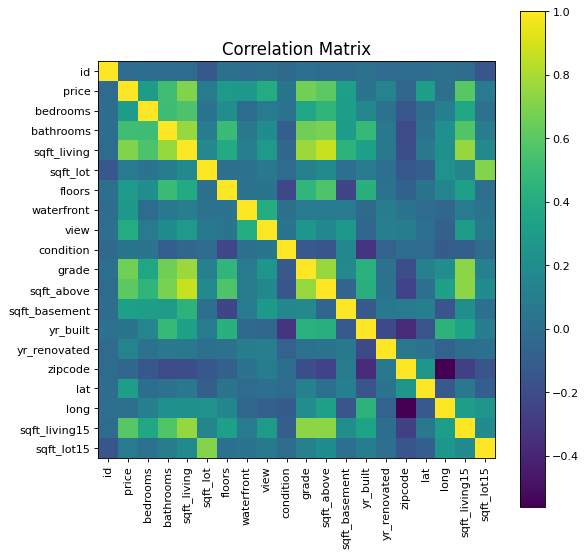

In [969]:
plotCorrelationMatrix(df, 8)

In [970]:
print(df.corr())

                     id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000 -0.014968  0.001319   0.002896    -0.013115 -0.136244   
price         -0.014968  1.000000  0.302262   0.523939     0.701237  0.085830   
bedrooms       0.001319  0.302262  1.000000   0.517139     0.566322  0.029946   
bathrooms      0.002896  0.523939  0.517139   1.000000     0.760377  0.092251   
sqft_living   -0.013115  0.701237  0.566322   0.760377     1.000000  0.171386   
sqft_lot      -0.136244  0.085830  0.029946   0.092251     0.171386  1.000000   
floors         0.016064  0.278863  0.201525   0.503112     0.391932  0.015858   
waterfront    -0.002530  0.268705 -0.007204   0.067608     0.107383  0.021823   
view           0.013126  0.400164  0.077548   0.195108     0.285543  0.069355   
condition     -0.022228  0.047331  0.035334  -0.095474    -0.045958 -0.017097   
grade          0.007036  0.665403  0.354602   0.660382     0.766485  0.117625   
sqft_above    -0.013140  0.6

## remove irrelevant columns

In [971]:
df = df.drop(columns=['id' , 'condition','zipcode' , 'lat' , 'long'])

## work with date columns

In [972]:
import datetime
df["date"]= pd.to_datetime(df.date)
df.head(4)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,7,1180,0,1955,0,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,7,2170,400,1951,1991,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,6,770,0,1933,0,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,7,1050,910,1965,0,1360,5000


In [973]:
age_of_house = [df["date"][index].year-df['yr_built'][index] for index in range(df.shape[0])]   
df['age_of_house'] = age_of_house
display(df.describe().T)
print("#############################################")
# we see that min of age of house is -1 .
df[df.age_of_house<0]

,count,mean,std,min,25%,50%,75%,max
price,20000.0,535473.747950,365948.372920,75000.0,317000.00,449950.0,640000.0,7700000.0
bedrooms,20000.0,3.364450,0.933740,0.0,3.00,3.0,4.0,33.0
bathrooms,20000.0,2.072013,0.762412,0.0,1.50,2.0,2.5,8.0
sqft_living,20000.0,2057.907000,905.625430,290.0,1420.00,1900.0,2510.0,13540.0
sqft_lot,20000.0,15606.366650,41770.244376,520.0,5350.00,7819.0,11000.0,1651359.0
floors,20000.0,1.444950,0.516776,1.0,1.00,1.0,2.0,3.5
waterfront,20000.0,0.007950,0.088810,0.0,0.00,0.0,0.0,1.0
view,20000.0,0.241800,0.777922,0.0,0.00,0.0,0.0,4.0
grade,20000.0,7.605750,1.172598,1.0,7.00,7.0,8.0,13.0
sqft_above,20000.0,1757.472700,811.606980,290.0,1180.00,1540.0,2150.0,9410.0


#############################################


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,age_of_house
1763,2014-06-25,597326.0,4,4.00,3570,8250,2.0,0,0,10,2860,710,2015,0,2230,10000,-1
2687,2014-10-29,385195.0,1,1.00,710,6000,1.5,0,0,6,710,0,2015,0,1440,4800,-1
7526,2014-12-31,614285.0,5,2.75,2730,6401,2.0,0,0,8,2730,0,2015,0,2520,6126,-1
8039,2014-06-24,455000.0,2,1.50,1200,1259,2.0,0,0,8,1000,200,2015,0,1320,1852,-1
14489,2014-08-26,500000.0,2,2.25,1570,1269,2.0,0,0,9,1280,290,2015,0,1570,6000,-1
17098,2014-06-17,350000.0,3,2.00,1380,3600,3.0,0,0,8,1380,0,2015,0,1480,3600,-1
19805,2014-08-01,455000.0,3,1.75,1320,1014,3.0,0,0,9,1320,0,2015,0,1380,1495,-1


In [974]:
# drop above rows
df.drop(df[df.age_of_house < 0].index , inplace =True)

In [975]:
# now , drop the yr_built and date columns
df.drop(columns=['date' , 'yr_built' ] , inplace=True)


In [976]:
# we have another columns that names yr_renovated
# lets see this correlation 
print(f"the correlation between renovated column and price of house is  : {df['yr_renovated'].corr(df['price'])}")     
# so there is a week correlation 
(df.yr_renovated.value_counts(normalize=True)*100).head()
# so there is around 95% of value of yr_renovates column is zero
# now drop the yr_renovate column 
df.drop(columns=['yr_renovated'] , inplace=True)

the correlation between renovated column and price of house is  : 0.13561736856296255


## duplicates

In [977]:
df.drop_duplicates(inplace=True)

## nan values

In [978]:
print(df.isna().sum())
print("#####################")
# the isna and isnull methods both have same function 

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
grade            0
sqft_above       0
sqft_basement    0
sqft_living15    0
sqft_lot15       0
age_of_house     0
dtype: int64
#####################


## set dataset

In [979]:
df
features = df.drop(['price'] , axis=1)
display(features)
target = df['price']
features = np.asarray(features)
target = np.asarray(target)
target.reshape(-1 , 1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,age_of_house
0,3,1.00,1180,5650,1.0,0,0,7,1180,0,1340,5650,59
1,3,2.25,2570,7242,2.0,0,0,7,2170,400,1690,7639,63
2,2,1.00,770,10000,1.0,0,0,6,770,0,2720,8062,82
3,4,3.00,1960,5000,1.0,0,0,7,1050,910,1360,5000,49
4,3,2.00,1680,8080,1.0,0,0,8,1680,0,1800,7503,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5,2.50,2690,5557,2.0,0,0,7,2690,0,2090,10500,2
19996,3,2.25,1530,1305,2.0,0,0,7,1116,414,1320,1427,8
19997,3,2.50,1600,6315,2.0,0,0,8,1600,0,1608,4300,1
19998,2,1.50,1000,1251,2.0,0,0,7,930,70,1420,1187,8


array([[221900.],
       [538000.],
       [180000.],
       ...,
       [287000.],
       [377000.],
       [649950.]])

## Train-Test-split

In [980]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train, y_test = train_test_split(features , target , train_size=0.8 ,shuffle=True  , random_state=7)    

In [981]:
y_train = y_train.reshape(-1 , 1)
y_test = y_test.reshape(-1 , 1)

## feature scaling

In [982]:
from sklearn.preprocessing import StandardScaler
ssc = StandardScaler()
# x_train = ssc.fit_transform(x_train)
# x_test= ssc.fit_transform(x_test)
y_train = ssc.fit_transform(y_train)
y_test= ssc.fit_transform(y_test)

## multiple linear regression

In [983]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train , y_train)

LinearRegression()

In [984]:
y_pred = regressor.predict(x_test)

In [985]:
from sklearn.metrics import r2_score
print("the r2_score of multiple linear regression is : " , r2_score(y_test , y_pred))

the r2_score of multiple linear regression is :  0.6715707252531715
